In [66]:
import os
os.getcwd()
os.chdir('C:\\Users\\HP\\Downloads\\datasets')

In [67]:
#importing essential libraries
import numpy as np
import pandas as pd

In [68]:
#loading the dataset
data = pd.read_csv('IBM HR Attrition Data.csv')

In [69]:
#let's look at it blue print 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Great! No null values are there. There are 34 features(excluding Target: Attrition), out of which 8 are categorical and rest are continous variables. Total of 1470 feature vectors or instances are present in the dataset. That's not quite a lot, but fine enough to get started.

In [70]:
#sliding the target column to the last of the dataframe
add_to_last = data[['Attrition']]
data.drop('Attrition', axis=1, inplace=True)
data['Attrition'] = add_to_last

In [71]:
#let's look at the stats for the data
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

So , the data doesn't looks scaled at all. 

In [129]:
#our labels are in categorical form, i would rather prefer them to be in binary form in some of the cases. This would help
#correlate them better with numerical variables. So let's add a target column which is just binary form of Attrition.
#this would just be for EDA purpose, i will remove it later
original_data = data.copy()
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder(dtype='int64')
data["Attrition label"] = encode.fit_transform(data[['Attrition']])

In [147]:
#since our data has lot of categorical values and let's separate the continous variables from 
#categorical ones to ease to process of interpretation and preprocessing.
data_num = data.select_dtypes(include='int64')
data_cat = data.select_dtypes(include='object')
print(data_num.shape, data_cat.shape)

(1470, 27) (1470, 9)


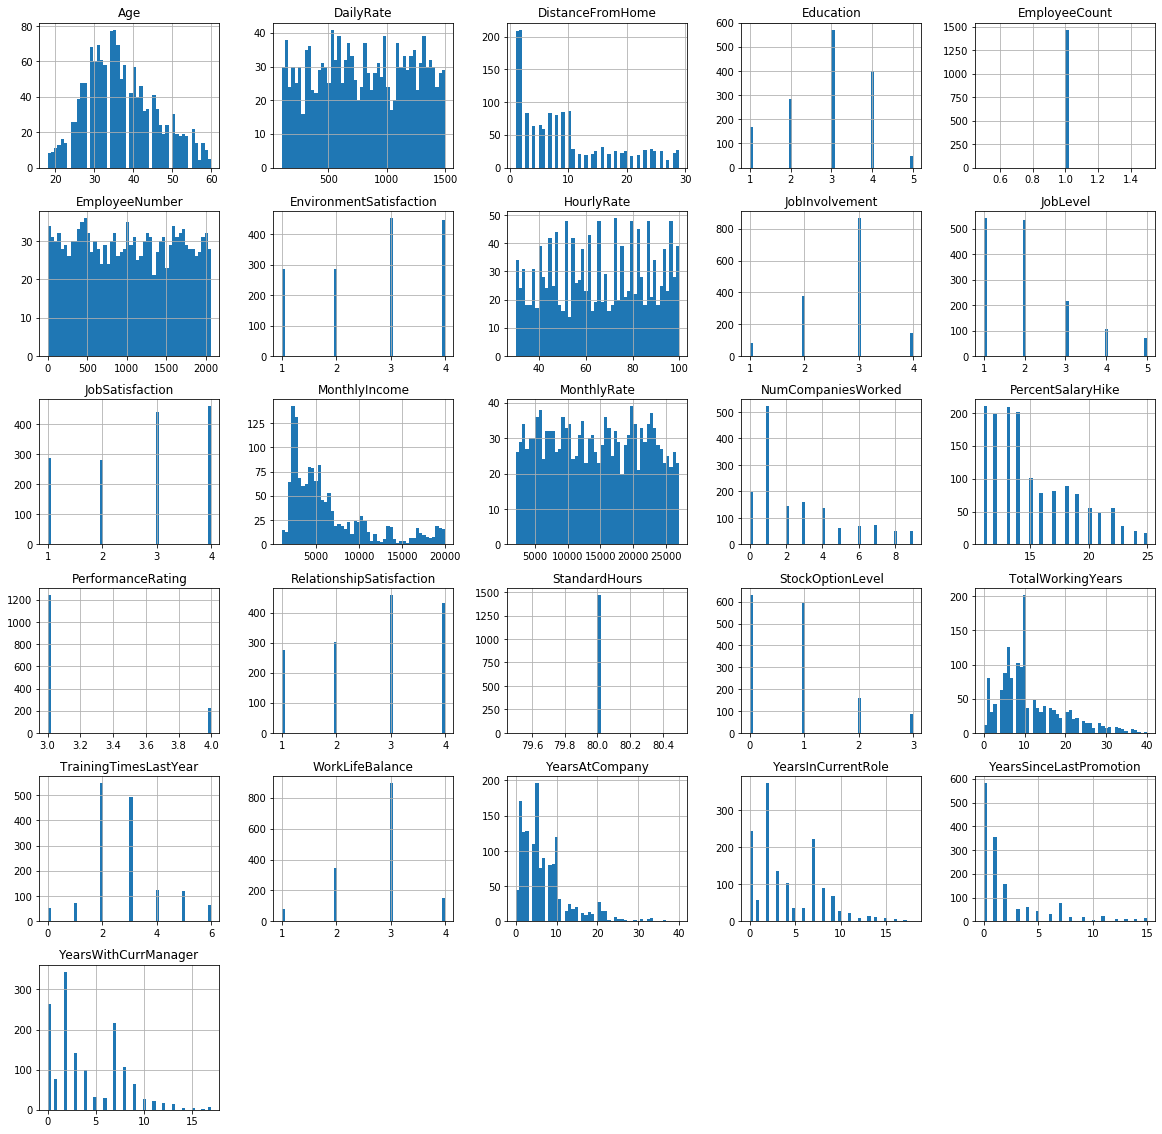

In [74]:
#let's plot the data using simple histogram to see the distribution of data.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

data_num.hist(figsize=(20,20), bins=50)
plt.show()

Well, there are a lot of features whose values seems to be grouped together into integer buckets, like 1, 2, 3, 4.., instead of real values. Rest of the features have different scales, although distribution is not that much of uneven.

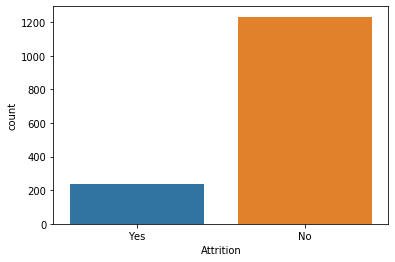

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [75]:
import seaborn as sns
sns.countplot(data['Attrition'])
plt.show()
data['Attrition'].value_counts()/data['Attrition'].shape[-1]*100

The labels seems to be more or less skewed. No problem we will balance the data. 

In [92]:
#let's have a look at the categorical data
data.select_dtypes(include='object')

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus Over18 OverTime Attrition  
0               Sales Executive        Single      Y      Yes       Yes  
1            Research Scientist       Married      Y       No        No  
2         Laboratory Technician        Single      Y      Yes       Yes  
3            Research Scientist       Married      Y      Yes        No  
4         Laboratory Technician       Married      Y       No        No  
...                         ...           ...    ...      ...       ...  
1465      Laboratory Technician       Married      Y       No        No  
1466  Healthcare Representative       Married      Y       No        No  
1467     Manufacturing Director       Married      Y      Yes        No  
1468            Sales Executive       Married      Y       No        No  
1469      Laboratory Technician       Married      Y       No        No  

[1470 rows x 9 columns]

In [77]:
#So basically this column is useless since this has no variation, we'll get rid of it.
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [78]:
data = data.drop(columns='Over18', axis=1)

let's try to find some insights about the categorical features and their relation to Attrition of an employee

In [106]:
#from my own intuition, "OverTime" can affect the employee satisfaction with his job. Let's check this column
print(data['OverTime'].value_counts())

#finding no. of overtime and non-overtime workers, Age wise
overtime_workers = data[data['OverTime'] == 'Yes']
non_overtime_workers = data[data['OverTime'] == 'No']

#finding overtime workers Attrition, Age wise
left_overtime_workers = overtime_workers[data["Attrition"] == 'Yes'].Age
retained_overtime_workers = overtime_workers[data["Attrition"] == 'No'].Age

No     1054
Yes     416
Name: OverTime, dtype: int64


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


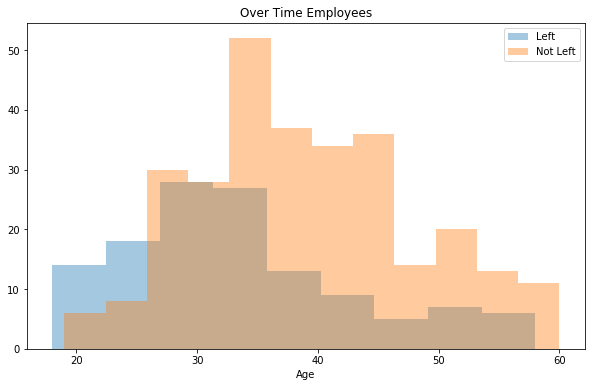

In [124]:
# f, ax = plt.subplots(1, 2, figsize=(10, 4))

#plot for overtime workers - Left and not left
plt.figure(figsize=(10,6))
sns.distplot(left_overtime_workers, label='Left', kde=False)
sns.distplot(retained_overtime_workers, label='Not Left', kde=False)
plt.legend()
plt.title('Over Time Employees')

plt.show()
#plot for non-overtime workers

> Well, As I could see, when it comes to "OverTime", employees who are young enough tend to leave the job more often than those who are in the mid of their career. More Specifically, Employees of age between 18-28 are less ratainable if they are made to work overtime, 28-38 age group are more or less similar(overlapping) and then people above 36 shows a sudden decline in Attrition.
> We can possibly make three age buckets in place of Age column. Let's see just Age and Attrition more closely.

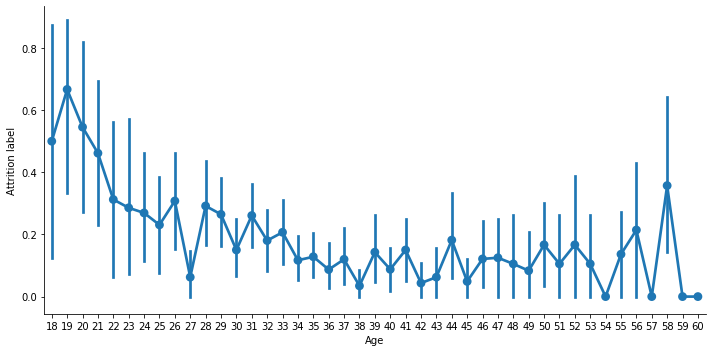

In [138]:
sns.catplot('Age','Attrition label', data=data, kind= 'point' , aspect = 2 )
plt.show()

> We were right, see that the younger people have higher attrition rate than the mid age people. I can probably make a few age groups here. Like 18-21 when they makes quite frequent switchs. 22-33 can be grouped since they seem similar except a few outliers. 33 above and until 45 also have similar level of attrition more or less, and then above 45 have a little higher.

> Notice, that at the end of the career, it's highly fluctuating because they are close to retirement, which depends on company to company.

In [182]:
#let's get back to the numerical data and find the correlation
plt.figure(figsize=(13,6))
num_corr = data_num.corr()

<Figure size 936x432 with 0 Axes>

The correlation matrix looks quite unintuitive and difficult to interpret. Remember that our labels are very skewed so i would go forward and balance them first in order to get clear insights.

In [177]:
X = data.drop(columns=['Attrition', 'Attrition label'])
y = data[['Attrition label']]

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=5, test_size=0.1)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[train_index]
    y_train, y_test = y.iloc[test_index], y.iloc[test_index]